# Análisis de simulaciones: El Farol

In [1]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import redes
import ElFarolFunciones as F
import seaborn as sns

### 100 simulaciones, 100 iteraciones, 100 individuos

Red completa, umbral $\mu = \frac{1}{2}$

In [2]:
Num_agentes = 100
#Num_iteraciones = 100
#PARS = [Num_agentes, 1]
#redes.random_graph(*PARS)
#identificador = 0
#UMBRAL = 0.5
#inicial = True
#No_exper = 100
#simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)
#inicial = False
#for N in range(No_exper - 1):
#    identificador += 1
#    simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)#Num_agentes = 100
#Num_iteraciones = 100
#PARS = [Num_agentes, 1]
#redes.random_graph(*PARS)
#identificador = 0
#UMBRAL = 0.5
#inicial = True
#No_exper = 100
#simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)
#inicial = False
#for N in range(No_exper - 1):
#    identificador += 1
#    simulacion(Num_agentes,Num_iteraciones,UMBRAL,inicial,identificador,PARS)

In [4]:
data = pd.read_csv('agentes_grande.csv')
df = pd.DataFrame(data.groupby(['Identificador','Ronda'])['Estado'].mean()).reset_index()
df.columns = ['Identificador','Ronda','Asistencia']
df['Asistencia'] = df['Asistencia'] * 100
df.head()

,Identificador,Ronda,Asistencia
0,0,0,50.0
1,0,1,54.0
2,0,2,62.0
3,0,3,62.0
4,0,4,62.0


Text(0.5, 1.0, 'Asistencia a El Farol por ronda')

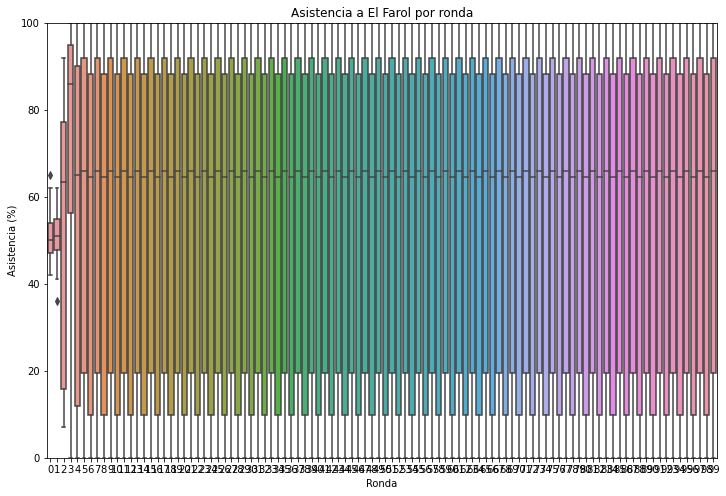

In [5]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='Ronda',y='Asistencia',data=df)
plt.ylabel('Asistencia (%)')
plt.ylim(0,100)
plt.title('Asistencia a El Farol por ronda')

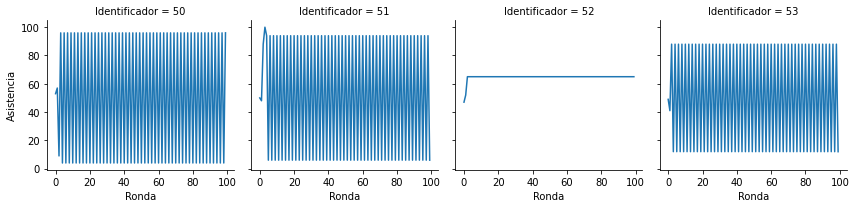

In [6]:
identificadores = list(df['Identificador'].unique())[50:54]
df2 = df[df['Identificador'].isin(identificadores)]
g = sns.FacetGrid(df2,col='Identificador')
g.map(plt.plot,'Ronda','Asistencia')

Text(0, 0.5, 'Puntaje Promedio')

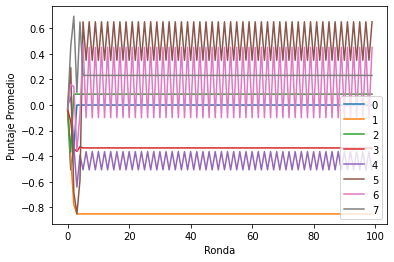

In [7]:
df = pd.DataFrame(data.groupby(['Ronda','Politica'])['Puntaje'].mean()).reset_index()
fig, ax = plt.subplots()
for label,group in df.groupby('Politica'):
    group.plot(x='Ronda', y='Puntaje', ax=ax,label=label)
plt.ylabel("Puntaje Promedio")

In [8]:
df = pd.DataFrame(data.groupby(['Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Ronda', 'Politica', 'num_agentes']
uso_politica = pd.pivot_table(
    data=df,
    index='Ronda',
    values='num_agentes',
    columns='Politica',
    aggfunc='sum'
).reset_index()
uso_politica = uso_politica.sort_values(by='Ronda',ascending=False)
uso_politica = uso_politica.set_index('Ronda')
uso_politica.head()

Politica,0,1,2,3,4,5,6,7
Ronda,,,,,,,,
99,391,1966,364,1555,5177,123,182,242
98,391,1966,364,1555,5177,123,182,242
97,391,1966,364,1555,5177,123,182,242
96,391,1966,364,1555,5177,123,182,242
95,391,1966,364,1555,5177,123,182,242


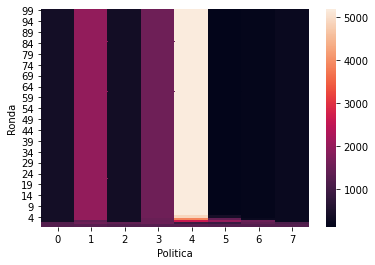

In [10]:
ax = sns.heatmap(uso_politica)

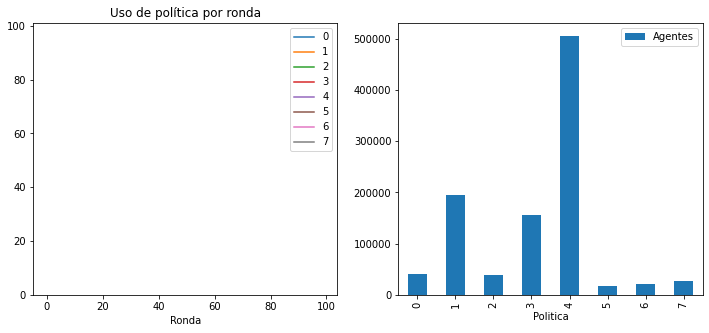

In [12]:
fig, ax = plt.subplots(1,2,figsize = (12,5))
for label,group in df.groupby('Politica'):
    group.plot(x='Ronda', y='num_agentes', ax=ax[0],label=label)
ax[0].set_ylim([0,Num_agentes+1])
ax[0].set_title('Uso de política por ronda')
df1 = pd.DataFrame(data.groupby('Politica')['Agente'].count())
df1.columns = ['Agentes']
#ax[1].plot(df.index, df['Agentes'])
df1.plot(kind="bar", ax = ax[1])